In [98]:
import requests as rq
import bs4
url = 'http://www.500.com/worldcup/saicheng/'
rsp = rq.get(url)
rsp.encoding = 'gb2312'
text = rsp.text

In [101]:
soup = bs4.BeautifulSoup(text, 'lxml')
table = soup.find(class_='games-tb')
games = []
tr = table.find_all('tr')
for r in tr:
    d = {}
    team = r.find_all(class_='team')
    d['home'] = team[0].text.strip()
    d['away'] = team[1].text.strip()

    score = r.find(class_='score')
    sh, sa = score.text.split(':')
    d['score_home'] = sh.strip()
    d['score_away'] = sa.strip()

    odds = r.find(class_='td-peilv')
    odds = odds.find_all('span')
    d['win'] = odds[0].text.strip()
    d['draw'] = odds[1].text.strip()
    d['lose'] = odds[2].text.strip()

    games.append(d)

In [155]:
def bet(money, odd):
#     return 1000
#     return 3000 / odd
#     return money * 0.1
#     if money <= 9000:
#         return 10000 - money
#     else:
#         return 1000
#     if odd > 7:
#         return 1000
    if odd > 7:
        if money <= 9000:
            return 10000 - money
        else:
            return 1000
    return 100

def hot(bingo, odds, money):
    chosen = min(odds)
    pay = bet(money, chosen)
    money -= pay
    if bingo == chosen:
        money += pay * bingo
    return money

def cold(bingo, odds, money):
    chosen = max(odds)
    pay = bet(money, chosen)
    money -= pay
    if bingo == chosen:
        money += pay * bingo
    return money

def mid(bingo, odds, money):
    chosen = sorted(odds)[1]
    pay = bet(money, chosen)
    money -= pay
    if bingo == chosen:
        money += pay * bingo
    return money

def nothot(bingo, odds, money):
    chosen = max(odds)
    pay = bet(money, chosen)
    money -= pay
    if bingo != min(odds):
        money += pay / 2 * bingo
    return money

def notcold(bingo, odds, money):
    chosen = min(odds)
    pay = bet(money, chosen)
    money -= pay
    if bingo != max(odds):
        money += pay / 2 * bingo
    return money

def buy(game, strategy, money):
    score_home = int(game['score_home'])
    score_away = int(game['score_away'])
    win = float(game['win'])
    draw = float(game['draw'])
    lose = float(game['lose'])
    odds = win, draw, lose
    if score_home > score_away:
        return strategy(win, odds, money)
    elif score_home < score_away:
        return strategy(lose, odds, money)
    else:
        return strategy(draw, odds, money)


In [156]:
def play(strategy):
    money = 10000
    money_wave = []
    money_min = 10000
    money_max = 10000
    for game in games:
        money = buy(game, strategy, money)
        money_wave.append(money)
        money_min = min(money, money_min)
        money_max = max(money, money_max)
    print('最低 %.1f 最高 %.1f 最终 %.1f' % (money_min, money_max, money))
    return money_wave

热门: 最低 9761.0 最高 10104.0 最终 9996.0
冷门: 最低 2448.0 最高 58367.1 最终 57207.1
非热门: 最低 6312.0 最高 17686.1 最终 16537.6
非冷门: 最低 9530.0 最高 10049.0 最终 9613.5
中间: 最低 8331.0 最高 10231.0 最终 8331.0


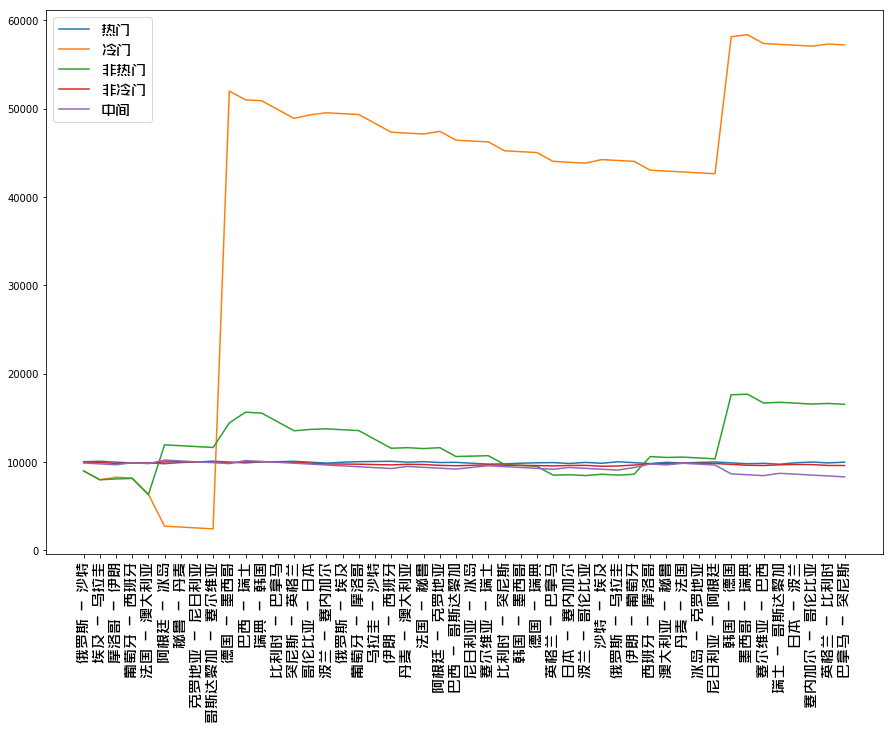

In [157]:
from matplotlib import pyplot as plt
from pylab import mpl
font = mpl.font_manager.FontProperties(fname='zhaozi.ttf', size=15)

print('热门:', end=' ')
buyhot = play(hot)
print('冷门:', end=' ')
buycold = play(cold)
print('非热门:', end=' ')
buynothot = play(nothot)
print('非冷门:', end=' ')
buynotcold = play(notcold)
print('中间:', end=' ')
buymid = play(mid)
plt.figure(figsize=(15, 10)) 
x = range(len(games))
teams = ['%s - %s' % (g['home'], g['away']) for g in games]
plt.xticks(x, teams, rotation=90, fontproperties=font)
plt.plot(x, buyhot)
plt.plot(buycold)
plt.plot(buynothot)
plt.plot(buynotcold)
plt.plot(buymid)
plt.legend(['热门', '冷门', '非热门', '非冷门', '中间'], prop=font)
plt.show()

In [ ]:
def buy(game, strategy, money):
    score_home = int(game['score_home'])
    score_away = int(game['score_away'])
    win = float(game['win'])
    draw = float(game['draw'])
    lose = float(game['lose'])
    odds = win, draw, lose
    if score_home > score_away:
        return strategy(win, odds, money)
    elif score_home < score_away:
        return strategy(lose, odds, money)
    else:
        return strategy(draw, odds, money)

def play(strategy):
    money = 10000
    money_wave = []
    money_min = 10000
    money_max = 10000
    for game in games:
        money = buy(game, strategy, money)
        money_wave.append(money)
        money_min = min(money, money_min)
        money_max = max(money, money_max)
    print('最低 %.1f 最高 %.1f 最终 %.1f' % (
        money_min, money_max, money))
    return money_wave